In [98]:
import pandas as pd
df=pd.read_csv('train_loan.csv')

array=df.values
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

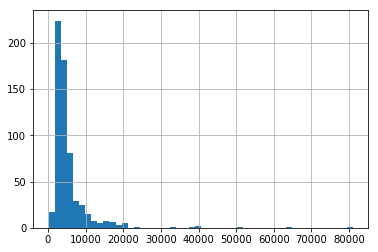

In [100]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)

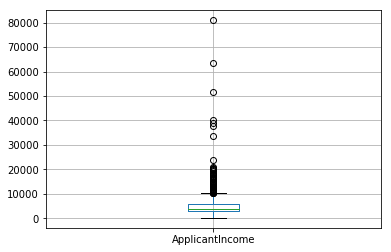

In [101]:
df.boxplot(column = 'ApplicantIncome')

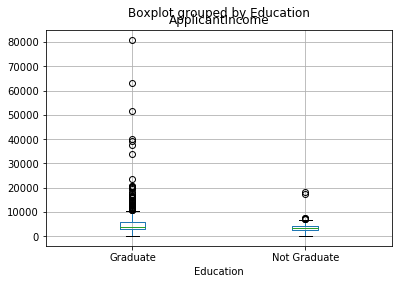

In [102]:
df.boxplot(column='ApplicantIncome', by = 'Education')

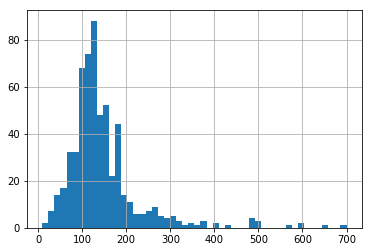

In [103]:
df['LoanAmount'].hist(bins=50)

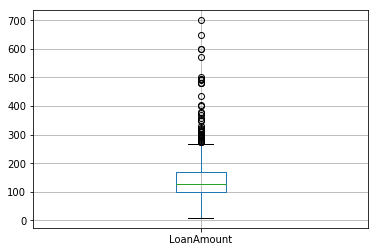

In [104]:
df.boxplot(column='LoanAmount')

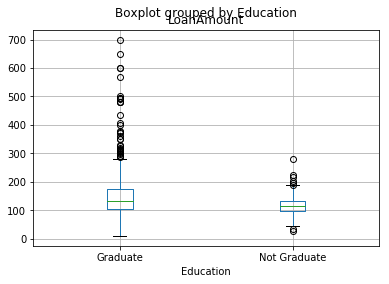

In [105]:
df.boxplot(column='LoanAmount',by='Education')

In [106]:
temp1=df['Credit_History'].value_counts()
print(temp1)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [107]:
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print(temp2)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


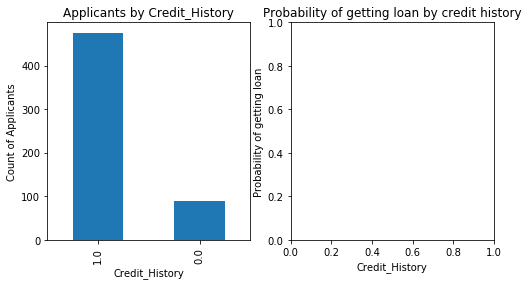

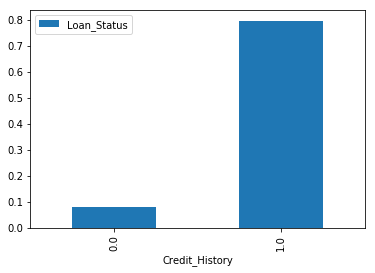

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar')


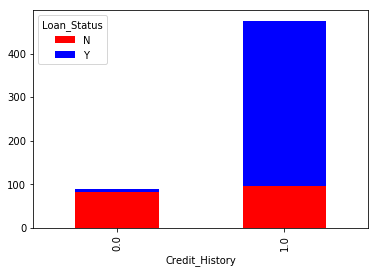

In [109]:
temp3 = pd.crosstab([df['Credit_History']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)



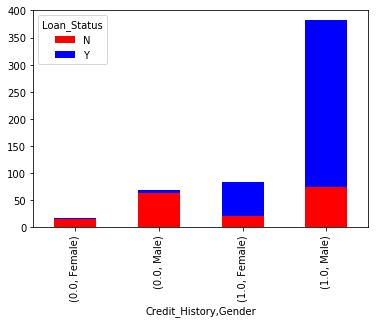

In [110]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [111]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [113]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
df['Self_Employed'].fillna('No',inplace=True)

In [115]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


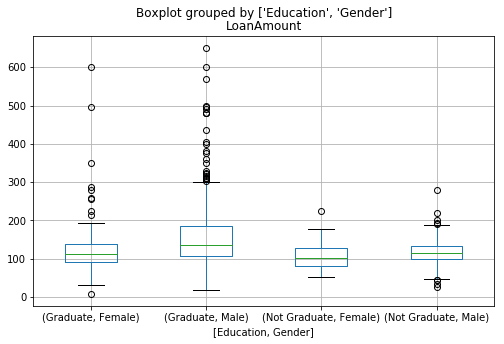

In [116]:
df.boxplot(column='LoanAmount',by=['Education','Gender'],figsize=(8,5))

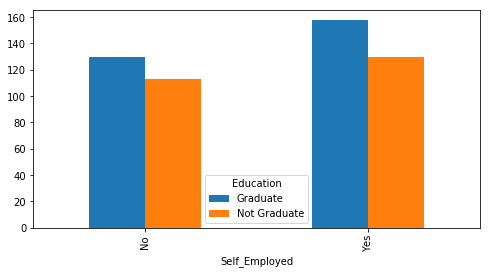

In [117]:
import numpy as np
temp3=df.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
temp3.plot(figsize=(8,4),kind='bar')

In [118]:
def fage(x):
    return temp3.loc[x['Self_Employed'],x['Education']]
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)
#mat3aytelhech martin sinon tji erreur

In [120]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


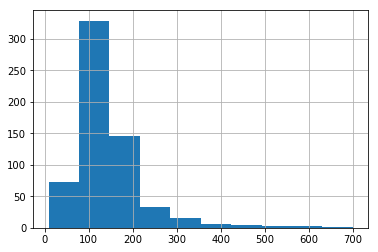

In [121]:
df['LoanAmount'].hist()

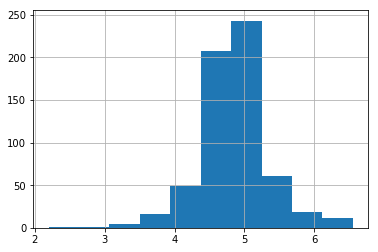

In [122]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist()

In [123]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)#mode[0] akthar valeur tet3awed
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [124]:
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})


In [125]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



In [126]:
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})


In [131]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})


In [136]:
df['Property_Area'] = df['Property_Area'].map({'Urban': 0,'Semiurban':1 ,'Rural': 2})


In [144]:
from sklearn.preprocessing import LabelEncoder
#label encode the target variable
encode = LabelEncoder()
df.Dependents = encode.fit_transform(df.Dependents)

In [145]:
df.head(200)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,1,0,5849,0.0,130.0,360.0,1.0,0,Y,4.867534
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N,4.852030
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,Y,4.189655
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,Y,4.787492
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,Y,4.948760
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,Y,5.587249
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,Y,4.553877
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,1,N,5.062595
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,Y,5.123964
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,N,5.855072


In [128]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  scores = cross_val_score(model, data[predictors], data[outcome], cv=5)
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(scores.mean()))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [163]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.957%


In [162]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.957%


In [147]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 98.534%
Cross-Validation Score : 76.068%


In [148]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

LoanAmount_log      0.400021
Credit_History      0.284422
Dependents          0.074961
Property_Area       0.063334
Loan_Amount_Term    0.057631
Married             0.032772
Education           0.032410
Gender              0.027545
Self_Employed       0.026904
dtype: float64


In [161]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.085%
Cross-Validation Score : 80.962%
